In [24]:
import pandas as pd

In [25]:
wine = pd.read_csv('wine.csv')
sample = wine.sample(10)
sample

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,1
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375,0
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885,0
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,2


In [26]:
#count the number of null values for each column
wine.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

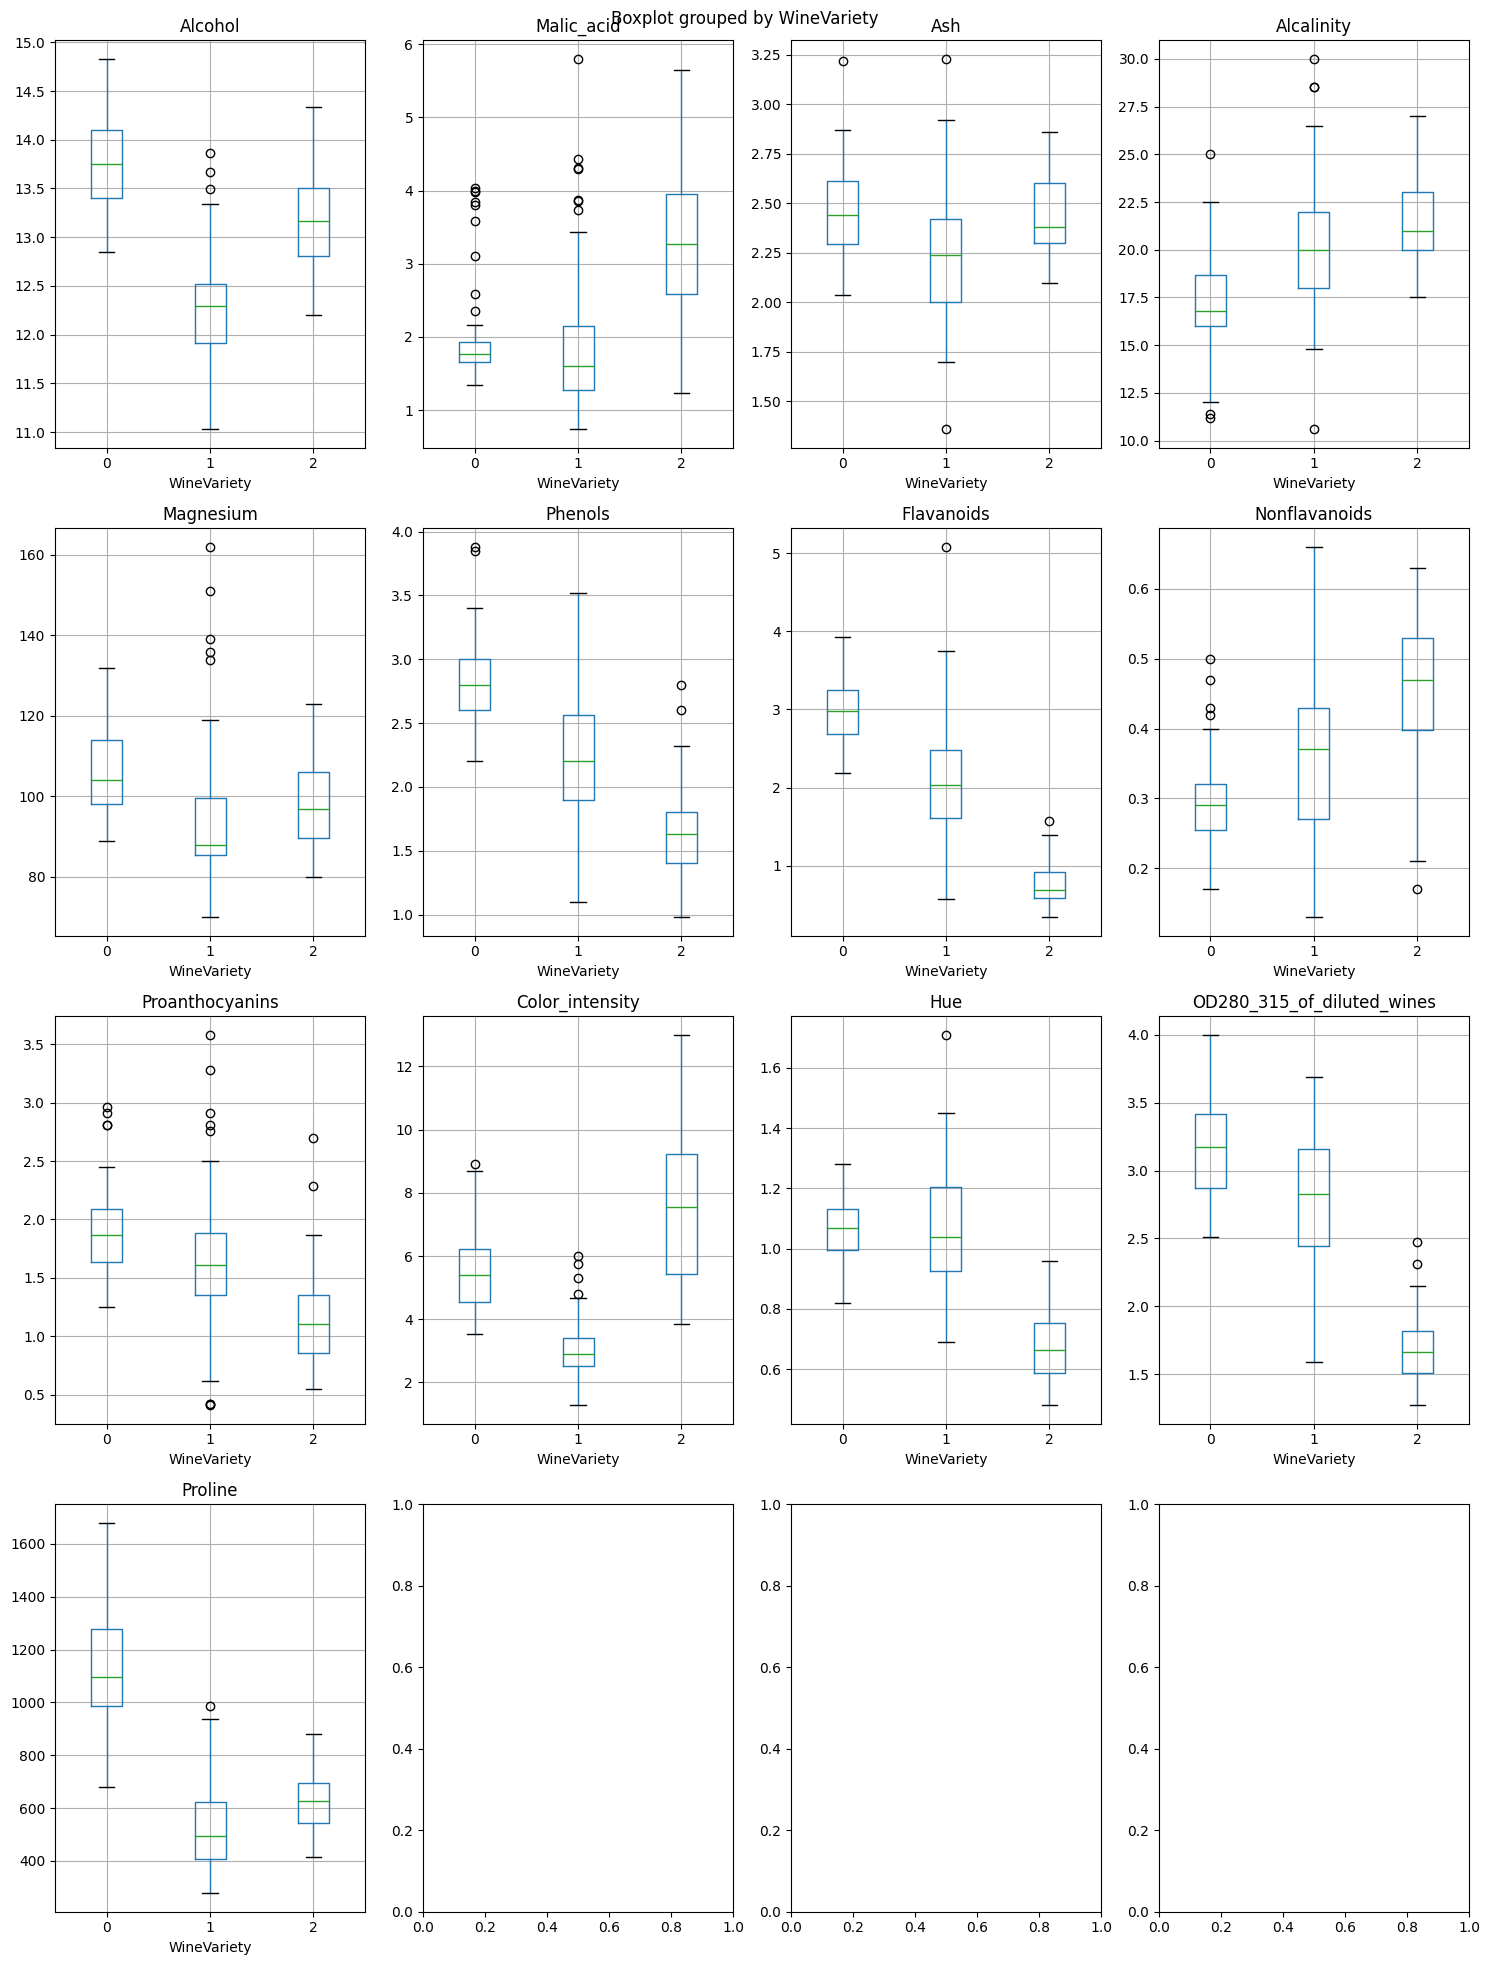

In [27]:
#show how features relate to label
from matplotlib import pyplot as plt 

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

wine_features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline']
wine_label = 'WineVariety'

for i, feature in enumerate(wine_features):
    ax = axs[i//4, i%4]
    wine.boxplot(column=feature, by=wine_label, ax=ax, figsize=(6,6))
    ax.set_title(feature)
plt.tight_layout()
plt.show()


In [28]:
#Prepare the data
from sklearn.model_selection import train_test_split
wine_X, wine_y = wine[wine_features].values, wine[wine_label].values

#split data 70% - 30% into training and test set
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(wine_X, wine_y,
                                                                        test_size=0.30,
                                                                        random_state=0,
                                                                        stratify=wine_y)
print ('Training Set: %d, Test Set: %d \n' % (x_wine_train.shape[0], x_wine_test.shape[0]))

Training Set: 124, Test Set: 54 



**Normalize features and trained model**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_wine_train, y_wine_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


In [31]:
# predict the label for the test wine_feature
wine_predictions = model.predict(x_wine_test)
print('Predicted labels: ', wine_predictions[:15])
print('Actual labels   : ' ,y_wine_test[:15])

Predicted labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 1]
Actual labels   :  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]


In [32]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_wine_test, wine_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [33]:
#We can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9710144927536232
Overall Recall: 0.9592592592592593


[[17  1  0]
 [ 0 21  0]
 [ 0  1 14]]


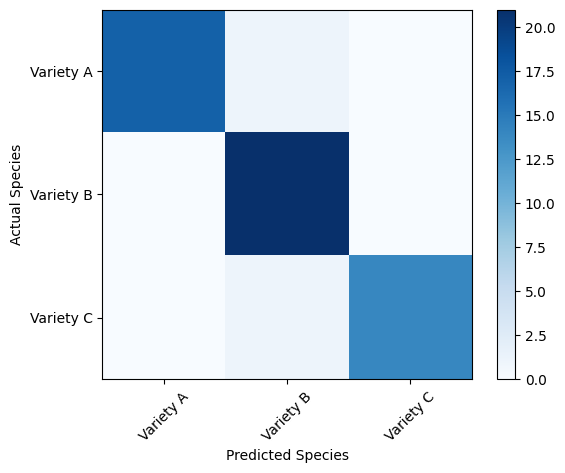

In [34]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_wine_test, wine_predictions)
print(mcm)

wine_classes = ['Variety A','Variety B','Variety C']

#Plot the heatmap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Variety A is the highest number of cases

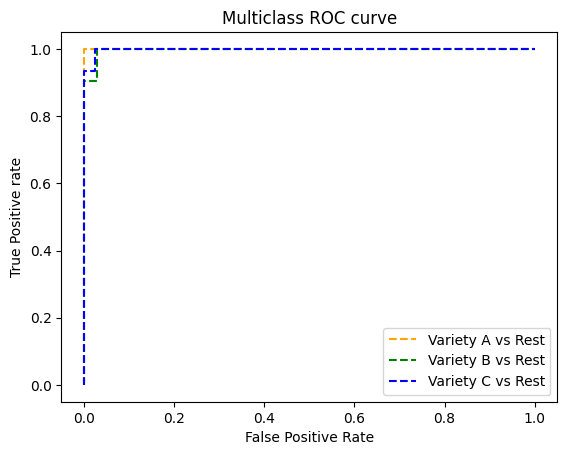

In [38]:
#Create ROC chart for each class
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = model.predict_proba(x_wine_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wine_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [39]:
#calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_wine_test,wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9984681984681986


In [40]:
import joblib

# Save the model as a pickle file
filename = './wine_model.pkl'
joblib.dump(model, filename)

# Load the saved model
model = joblib.load(filename)

# Get predictions for two new wine samples
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
predictions = model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + wine_classes[prediction] +')')

0 (Variety A)
1 (Variety B)
